<a href="https://colab.research.google.com/github/thaonguyen274/Data_preparation/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Build K-means model by numpy in Python. 

In [ ]:
from __future__ import print_function 
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)

In [ ]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T

In [ ]:
original_label

array([0, 0, 0, ..., 2, 2, 2])

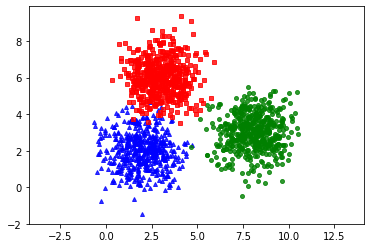

In [ ]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
    
kmeans_display(X, original_label)

In [ ]:
points = np.vstack((X0,X1,X2))
points 


array([[ 3.74945474,  1.713927  ],
       [ 1.51543487, -0.65331856],
       [ 1.99171537,  1.68036864],
       ...,
       [ 2.56402984,  5.10138061],
       [ 3.62998852,  6.60564711],
       [ 2.31894139,  6.84856953]])

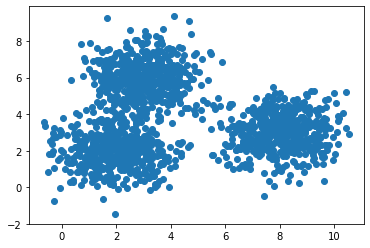

In [ ]:
plt.scatter(points[:,0], points[:, 1])

In [ ]:
def find_centroids(points, k):
  random_num = random.sample(range(X.shape[0]), K)
  centroids = points[random_num]
  return centroids[:k]


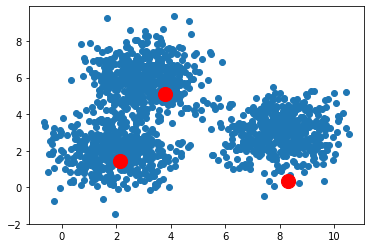

In [ ]:
plt.scatter(points[:, 0], points[:, 1])
centroids = find_centroids(points, 3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=200)

In [ ]:
centroids.shape

(3, 2)

In [ ]:
points.shape

(1500, 2)

In [ ]:
# return array containing the index to the nearest centroid for each point
def closest_centroids(points, centroids):
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

In [ ]:
closest_centroids(points, centroids)

array([2, 2, 2, ..., 0, 0, 0])

In [123]:
#returns an array of new centroids after label data for each classes which have nearest centroid
def update_centroids(points, labels, centroids):
  centroids = np.zeros((K, X.shape[1]))
  for i in range(K):
    new_centroid = X[labels == i, :]
    centroids[i, :] = np.mean(new_centroid, axis = 0)
  return centroids

In [124]:
update_centroids(points, closest_centroids(points, centroids), centroids)

array([[2.99084705, 6.04196062],
       [1.97563391, 2.01568065],
       [8.03643517, 3.02468432]])

In [125]:
centroids

array([[2.99084705, 6.04196062],
       [1.97563391, 2.01568065],
       [8.03643517, 3.02468432]])

centroids mới có giá trị sát với giá trị của update_centroids

In [126]:
def k_means(points, k):
  centroids = find_centroids(points, k)
  running = True
  while running:
    closest = closest_centroid(points, centroids)
    old_centroids = centroids
    centroids = update_centroids(points, closest, centroids)
    # print(centroids)
    # print(old_centroids)
    if np.all(old_centroids == centroids):
      running = False
  return (closest, centroids)

In [127]:
def k_display(points,closest,centroids):
    plt.scatter(points[:, 0], points[:, 1], c=closest)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
    plt.show()

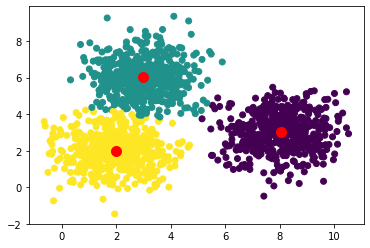

In [128]:
closest,centroids = k_mean(points, 3)
k_display(points,closest,centroids)

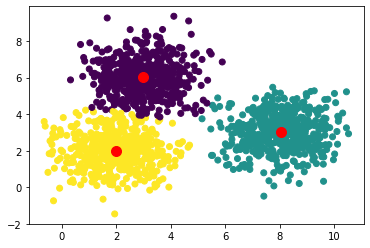

In [129]:
closest,centroids = k_mean(points, 4)
k_display(points,closest,centroids)

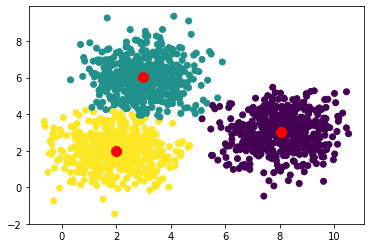

In [130]:
closest,centroids = k_mean(points, 5)
k_display(points,closest,centroids)